In [3]:
import Analysis
import cPickle as pickle
reload(Analysis)

A = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore')

A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=0.)
A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')

# Load 2FGL 
A.AddPointSourceTemplate(fixNorm=True)

A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '.npy',
                        alpha_psc=5., f_psc=0.1)

A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties

A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False)

#A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
#                r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None,)

A.PrintTemplates()

                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
                 PSC              [None, None]  1.000e+00       True       True        PSC
             Bubbles              [None, None]  1.000e+00      False      False        GEN
           Isotropic              [None, None]  1.000e+00      False      False        ISO


In [11]:
models = ['base_2D', 'base', 'NSPEB_H2_8500', 
          'NSPEB_HI_8500_interp0','NSPEB_HI_8500_interp25','NSPEB_HI_8500_interp50',
          'NSPEB_HI_8500_interp75','NSPEB_HI_8500_interp1.0','Pohl_HI_8500','Pohl_H2_8500']

models = ['Pohl_H2_8500']#,'Pohl_H2_8500']


# Load various diffuse models and run fits.
for galprop_tag in models:
    A.ResetFit()
    A.AddGalpropTemplate(basedir='/data/galprop2/output/', tag=galprop_tag, 
                         verbosity=1, multiplier=1., bremsfrac=1.25, E_subsample=3, fixSpectrum=False)
    A.RunLikelihood(print_level=0, tol=2e2, precision=None, minos=True)
    base = A.SaveFit(filename='./results/FitResult_'+ galprop_tag + '.pickle')




Loading FITS
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Masking completed in 1.3584e-01 s
Write likelihood tempfile to  /tmp/tmpH3df2S
Code generation completed in 1.1790e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -781929.197691 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 3.3221593897e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_0,2.818586e+00,3.010543e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_0,9.897928e-01,1.776096e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,7.338839e-01,1.279404e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_0,4.894525e-01,2.923415e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.07e-01 s
Masking completed in 1.1687e-01 s
Write likelihood tempfile to  /tmp/tmpNcTvwk
Code generation completed in 1.6291e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -634322.385219 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00120983163074 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_1,2.904300e+00,3.251291e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_1,9.698829e-01,1.721549e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,5.657800e-01,1.354484e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_1,5.149607e-01,3.109492e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.84e-01 s
Masking completed in 1.1561e-01 s
Write likelihood tempfile to  /tmp/tmpNphBXT
Code generation completed in 1.6851e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -507991.220432 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 2.70347663059e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_2,2.911871e+00,3.594028e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_2,1.278268e+00,1.676941e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,5.244940e-01,1.386724e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_2,5.568339e-01,3.408855e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.85e-01 s
Masking completed in 1.2391e-01 s
Write likelihood tempfile to  /tmp/tmpiFGqZt
Code generation completed in 1.5750e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -405353.873224 
 TOTAL NCALL = 108 
 NCALLS = 108 
 
 
 EDM = 0.00287517549106 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_3,2.944312e+00,3.805207e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_3,1.299309e+00,1.708045e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,4.456728e-01,1.393487e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_3,5.671124e-01,3.620604e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.60e-01 s
Masking completed in 1.2162e-01 s
Write likelihood tempfile to  /tmp/tmpv9vBB2
Code generation completed in 1.6570e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -394443.565584 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 6.17938418255e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_4,2.953915e+00,3.942766e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_4,1.143504e+00,1.570885e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,6.972572e-01,1.293301e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_4,6.111498e-01,3.785151e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.80e-01 s
Masking completed in 1.2141e-01 s
Write likelihood tempfile to  /tmp/tmp2Kpp5H
Code generation completed in 1.4520e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -390734.133293 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 3.94406412502e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_5,2.896387e+00,3.812529e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_5,1.334161e+00,1.429397e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,5.425275e-01,1.164239e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_5,6.194188e-01,3.751990e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.73e-01 s
Masking completed in 1.3150e-01 s
Write likelihood tempfile to  /tmp/tmpYuqw0Q
Code generation completed in 1.4479e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -379538.635315 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.00254630642977 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_6,2.839749e+00,3.846672e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_6,1.476714e+00,1.335673e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,6.623317e-01,1.028226e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_6,6.591178e-01,3.913149e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.51e-01 s
Masking completed in 1.3065e-01 s
Write likelihood tempfile to  /tmp/tmpP1p7te
Code generation completed in 1.4551e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -360780.042493 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 4.96285248202e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_7,2.746338e+00,3.857583e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_7,1.461544e+00,1.244807e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,7.053632e-01,9.996935e-02,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_7,6.802486e-01,4.016087e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.77e-01 s
Masking completed in 1.3160e-01 s
Write likelihood tempfile to  /tmp/tmpajmFkd
Code generation completed in 1.7490e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -341523.349387 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 1.15210370709e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_8,2.740049e+00,3.922280e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_8,1.562081e+00,1.206487e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,6.521786e-01,9.929682e-02,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_8,7.096977e-01,4.181094e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.77e-01 s
Masking completed in 1.3200e-01 s
Write likelihood tempfile to  /tmp/tmpgbmfJa
Code generation completed in 1.3411e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -315418.997121 
 TOTAL NCALL = 103 
 NCALLS = 103 
 
 
 EDM = 0.00243308712789 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_9,2.709767e+00,3.990801e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_9,1.580012e+00,1.231861e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,7.216449e-01,9.950529e-02,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_9,7.380350e-01,4.411711e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.54e-01 s
Masking completed in 1.3182e-01 s
Write likelihood tempfile to  /tmp/tmpQTRpPm
Code generation completed in 1.5080e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -287057.885867 
 TOTAL NCALL = 116 
 NCALLS = 116 
 
 
 EDM = 6.64493702989e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_10,2.541097e+00,4.089575e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_10,1.681229e+00,1.149053e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,8.294914e-01,1.038037e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_10,8.027540e-01,4.774929e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.73e-01 s
Masking completed in 1.3210e-01 s
Write likelihood tempfile to  /tmp/tmpzDNuYs
Code generation completed in 9.4295e-04 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -244022.05676 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.00378394114239 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_11,2.490328e+00,4.165293e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_11,1.793725e+00,1.164888e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,7.276174e-01,1.090451e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_11,8.267516e-01,5.153238e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.50e-01 s
Masking completed in 1.3108e-01 s
Write likelihood tempfile to  /tmp/tmp2qgUnV
Code generation completed in 1.3881e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -216856.983212 
 TOTAL NCALL = 118 
 NCALLS = 118 
 
 
 EDM = 4.32500101459e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_12,2.546623e+00,4.437081e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_12,1.772251e+00,1.090072e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,8.159698e-01,1.167137e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_12,9.218794e-01,5.907141e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.76e-01 s
Masking completed in 1.3152e-01 s
Write likelihood tempfile to  /tmp/tmpDclvFG
Code generation completed in 1.4968e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -176819.018475 
 TOTAL NCALL = 100 
 NCALLS = 100 
 
 
 EDM = 0.000664355631143 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_13,2.451628e+00,4.560646e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_13,2.040706e+00,1.051897e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,6.801834e-01,1.223504e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_13,9.940338e-01,6.668206e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.50e-01 s
Masking completed in 1.3218e-01 s
Write likelihood tempfile to  /tmp/tmpOMobWH
Code generation completed in 1.5390e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -130587.009281 
 TOTAL NCALL = 113 
 NCALLS = 113 
 
 
 EDM = 4.50243378773e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_14,2.360679e+00,4.663957e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_14,1.599007e+00,9.307559e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,7.527320e-01,1.102173e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_14,1.058792e+00,7.649548e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.69e-01 s
Masking completed in 1.3165e-01 s
Write likelihood tempfile to  /tmp/tmp4_RJdG
Code generation completed in 1.1480e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -84765.7244542 
 TOTAL NCALL = 113 
 NCALLS = 113 
 
 
 EDM = 2.24830359237e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_15,2.305711e+00,4.835845e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_15,1.595849e+00,8.879135e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,8.351272e-01,1.059732e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_15,1.105134e+00,8.930181e-03,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.68e-01 s
Masking completed in 1.3221e-01 s
Write likelihood tempfile to  /tmp/tmpJsCjBF
Code generation completed in 1.4780e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -46986.3346126 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 1.4053822474e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_16,2.280500e+00,5.199050e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_16,1.674907e+00,9.666074e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,8.075374e-01,1.224998e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_16,1.169402e+00,1.082754e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.81e-01 s
Masking completed in 1.3179e-01 s
Write likelihood tempfile to  /tmp/tmp3yfoSg
Code generation completed in 1.4720e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -16843.1629979 
 TOTAL NCALL = 112 
 NCALLS = 112 
 
 
 EDM = 1.20569593753e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_17,2.252375e+00,5.704452e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_17,1.668386e+00,9.741909e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,8.894632e-01,1.444270e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_17,1.237259e+00,1.353467e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.70e-01 s
Masking completed in 1.3223e-01 s
Write likelihood tempfile to  /tmp/tmpgAN_Of
Code generation completed in 1.4091e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 1986.58552374 
 TOTAL NCALL = 112 
 NCALLS = 112 
 
 
 EDM = 3.91419592567e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_18,2.102221e+00,6.163480e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_18,1.333168e+00,8.248724e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,9.428819e-01,1.473760e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_18,1.312775e+00,1.699530e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.68e-01 s
Masking completed in 1.3108e-01 s
Write likelihood tempfile to  /tmp/tmpsUNiIZ
Code generation completed in 1.3530e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 13193.2129918 
 TOTAL NCALL = 93 
 NCALLS = 93 
 
 
 EDM = 0.00551013812435 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_19,1.992280e+00,6.896970e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_19,1.084188e+00,7.224795e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,9.328068e-01,1.289210e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_19,1.366914e+00,2.224313e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.40e-01 s
Masking completed in 1.3104e-01 s
Write likelihood tempfile to  /tmp/tmp2mES4w
Code generation completed in 9.9111e-04 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 16763.4770883 
 TOTAL NCALL = 103 
 NCALLS = 103 
 
 
 EDM = 2.40409905646e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_20,1.990022e+00,8.186468e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_20,1.085451e+00,7.233965e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,9.222305e-01,1.254279e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_20,1.484438e+00,3.129358e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.55e-01 s
Masking completed in 1.3139e-01 s
Write likelihood tempfile to  /tmp/tmpihg1PQ
Code generation completed in 2.4331e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 15335.9696647 
 TOTAL NCALL = 105 
 NCALLS = 105 
 
 
 EDM = 0.000130056429458 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_21,1.946307e+00,1.044233e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_21,1.075267e+00,7.507828e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,9.728641e-01,1.189564e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_21,1.662522e+00,4.731242e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.59e-01 s
Masking completed in 1.3043e-01 s
Write likelihood tempfile to  /tmp/tmpxZ5iM_
Code generation completed in 1.5070e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 10574.8639326 
 TOTAL NCALL = 114 
 NCALLS = 114 
 
 
 EDM = 3.27473270633e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_22,1.867772e+00,1.714174e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_22,8.472887e-01,7.719186e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.287459e-01,1.233981e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_22,2.404502e+00,9.376051e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.71e-01 s
Masking completed in 1.3053e-01 s
Write likelihood tempfile to  /tmp/tmp_590X1
Code generation completed in 1.4870e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 4632.57650487 
 TOTAL NCALL = 116 
 NCALLS = 116 
 
 
 EDM = 0.00524876611324 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_23,2.629453e+00,5.282722e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_23,8.529086e-01,1.329795e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.547838e-01,2.202843e-01,0.000000e+00,0.000000e+00,,,
5,Pi0_Brems_23,4.575904e+00,3.128325e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.78e-01 s


Error,-0.0306697618379,0.0307735189904
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.181453483089,0.181503809793
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.132016254302,0.131651315425
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00294830386428,0.00294639358511
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_0,2.818586e+00,3.010529e-02,-3.066976e-02,3.077352e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_0,9.897928e-01,1.776083e-01,-1.814535e-01,1.815038e-01,,,
4,Isotropic_0,7.338839e-01,1.279393e-01,-1.320163e-01,1.316513e-01,,,
5,Pi0_Brems_0,4.894525e-01,2.923412e-03,-2.948304e-03,2.946394e-03,,,


+,ICS_0,Bubbles_0,Isotropic_0,Pi0_Brems_0
ICS_0,1.00,0.19,-0.68,-0.71
Bubbles_0,0.19,1.00,-0.76,0.04
Isotropic_0,-0.68,-0.76,1.00,0.24
Pi0_Brems_0,-0.71,0.04,0.24,1.00


Error,-0.033834837981,0.0324441983873
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.174743081822,0.176326976909
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.136526788241,0.141854732929
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00317799305534,0.00309395919133
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_1,2.904300e+00,3.251375e-02,-3.383484e-02,3.244420e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_1,9.698829e-01,1.721601e-01,-1.747431e-01,1.763270e-01,,,
4,Isotropic_1,5.657800e-01,1.354540e-01,-1.365268e-01,1.418547e-01,,,
5,Pi0_Brems_1,5.149607e-01,3.109522e-03,-3.177993e-03,3.093959e-03,,,


+,ICS_1,Bubbles_1,Isotropic_1,Pi0_Brems_1
ICS_1,1.00,0.17,-0.67,-0.70
Bubbles_1,0.17,1.00,-0.75,0.04
Isotropic_1,-0.67,-0.75,1.00,0.23
Pi0_Brems_1,-0.70,0.04,0.23,1.00


Error,-0.0366033932024,0.036335934057
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.169768206563,0.170538533508
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.141380053435,0.141861063211
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00340979258779,0.00345145180798
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_2,2.911871e+00,3.594032e-02,-3.660339e-02,3.633593e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_2,1.278268e+00,1.676945e-01,-1.697682e-01,1.705385e-01,,,
4,Isotropic_2,5.244940e-01,1.386728e-01,-1.413801e-01,1.418611e-01,,,
5,Pi0_Brems_2,5.568339e-01,3.408856e-03,-3.409793e-03,3.451452e-03,,,


+,ICS_2,Bubbles_2,Isotropic_2,Pi0_Brems_2
ICS_2,1.00,0.13,-0.65,-0.70
Bubbles_2,0.13,1.00,-0.73,0.06
Isotropic_2,-0.65,-0.73,1.00,0.22
Pi0_Brems_2,-0.70,0.06,0.22,1.00


Error,-0.0380401079875,0.0392333487939
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.164217855005,0.182434315516
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.146302748816,0.138116921304
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00362673416154,0.00367672298126
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_3,2.944312e+00,3.805067e-02,-3.804011e-02,3.923335e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_3,1.299309e+00,1.708048e-01,-1.642179e-01,1.824343e-01,,,
4,Isotropic_3,4.456728e-01,1.393462e-01,-1.463027e-01,1.381169e-01,,,
5,Pi0_Brems_3,5.671124e-01,3.620528e-03,-3.626734e-03,3.676723e-03,,,


+,ICS_3,Bubbles_3,Isotropic_3,Pi0_Brems_3
ICS_3,1.00,0.07,-0.64,-0.70
Bubbles_3,0.07,1.00,-0.69,0.07
Isotropic_3,-0.64,-0.69,1.00,0.21
Pi0_Brems_3,-0.70,0.07,0.21,1.00


Error,-0.0400684591007,0.039612660609
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.160115767154,0.156989115211
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.129956153693,0.132331823109
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00378442873798,0.00382560499711
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_4,2.953915e+00,3.942746e-02,-4.006846e-02,3.961266e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_4,1.143504e+00,1.570867e-01,-1.601158e-01,1.569891e-01,,,
4,Isotropic_4,6.972572e-01,1.293284e-01,-1.299562e-01,1.323318e-01,,,
5,Pi0_Brems_4,6.111498e-01,3.785144e-03,-3.784429e-03,3.825605e-03,,,


+,ICS_4,Bubbles_4,Isotropic_4,Pi0_Brems_4
ICS_4,1.00,0.02,-0.60,-0.70
Bubbles_4,0.02,1.00,-0.66,0.09
Isotropic_4,-0.60,-0.66,1.00,0.19
Pi0_Brems_4,-0.70,0.09,0.19,1.00


Error,-0.0384250691302,0.0385041740725
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.143533725144,0.14451979216
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.117664274407,0.117816142521
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00378799111961,0.00375237894022
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_5,2.896387e+00,3.812511e-02,-3.842507e-02,3.850417e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_5,1.334161e+00,1.429398e-01,-1.435337e-01,1.445198e-01,,,
4,Isotropic_5,5.425275e-01,1.164237e-01,-1.176643e-01,1.178161e-01,,,
5,Pi0_Brems_5,6.194188e-01,3.751981e-03,-3.787991e-03,3.752379e-03,,,


+,ICS_5,Bubbles_5,Isotropic_5,Pi0_Brems_5
ICS_5,1.00,-0.04,-0.57,-0.71
Bubbles_5,-0.04,1.00,-0.63,0.11
Isotropic_5,-0.57,-0.63,1.00,0.17
Pi0_Brems_5,-0.71,0.11,0.17,1.00


Error,-0.0371720865843,0.0405928126882
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.129281800086,0.140574742078
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.108811690527,0.0992627338582
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00414003764968,0.00374825910179
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_6,2.839749e+00,3.846409e-02,-3.717209e-02,4.059281e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_6,1.476714e+00,1.335621e-01,-1.292818e-01,1.405747e-01,,,
4,Isotropic_6,6.623317e-01,1.028161e-01,-1.088117e-01,9.926273e-02,,,
5,Pi0_Brems_6,6.591178e-01,3.912996e-03,-4.140038e-03,3.748259e-03,,,


+,ICS_6,Bubbles_6,Isotropic_6,Pi0_Brems_6
ICS_6,1.00,-0.11,-0.53,-0.71
Bubbles_6,-0.11,1.00,-0.59,0.12
Isotropic_6,-0.53,-0.59,1.00,0.15
Pi0_Brems_6,-0.71,0.12,0.15,1.00


Error,-0.0389098046501,0.038781720603
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.125259752937,0.124977810685
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.100591653329,0.100792067735
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00402041200227,0.00404711618305
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_7,2.746338e+00,3.857592e-02,-3.890980e-02,3.878172e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_7,1.461544e+00,1.244810e-01,-1.252598e-01,1.249778e-01,,,
4,Isotropic_7,7.053632e-01,9.996966e-02,-1.005917e-01,1.007921e-01,,,
5,Pi0_Brems_7,6.802486e-01,4.016092e-03,-4.020412e-03,4.047116e-03,,,


+,ICS_7,Bubbles_7,Isotropic_7,Pi0_Brems_7
ICS_7,1.00,-0.16,-0.50,-0.72
Bubbles_7,-0.16,1.00,-0.56,0.14
Isotropic_7,-0.50,-0.56,1.00,0.14
Pi0_Brems_7,-0.72,0.14,0.14,1.00


Error,-0.0394339425172,0.0395181932118
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.121376988438,0.121011813822
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0998236497245,0.0999865851926
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0041983975233,0.00419896911084
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_8,2.740049e+00,3.922287e-02,-3.943394e-02,3.951819e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_8,1.562081e+00,1.206486e-01,-1.213770e-01,1.210118e-01,,,
4,Isotropic_8,6.521786e-01,9.929684e-02,-9.982365e-02,9.998659e-02,,,
5,Pi0_Brems_8,7.096977e-01,4.181100e-03,-4.198398e-03,4.198969e-03,,,


+,ICS_8,Bubbles_8,Isotropic_8,Pi0_Brems_8
ICS_8,1.00,-0.19,-0.47,-0.72
Bubbles_8,-0.19,1.00,-0.54,0.14
Isotropic_8,-0.47,-0.54,1.00,0.13
Pi0_Brems_8,-0.72,0.14,0.13,1.00


Error,-0.0381710430648,0.0424128545486
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.127206850462,0.120914474825
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.102227416325,0.0983650675293
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00449011164158,0.00439314215689
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_9,2.709767e+00,3.990789e-02,-3.817104e-02,4.241285e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_9,1.580012e+00,1.231855e-01,-1.272069e-01,1.209145e-01,,,
4,Isotropic_9,7.216449e-01,9.950474e-02,-1.022274e-01,9.836507e-02,,,
5,Pi0_Brems_9,7.380350e-01,4.411707e-03,-4.490112e-03,4.393142e-03,,,


+,ICS_9,Bubbles_9,Isotropic_9,Pi0_Brems_9
ICS_9,1.00,-0.23,-0.45,-0.73
Bubbles_9,-0.23,1.00,-0.51,0.15
Isotropic_9,-0.45,-0.51,1.00,0.12
Pi0_Brems_9,-0.73,0.15,0.12,1.00


Error,-0.0410078428196,0.0412482247586
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.115406118521,0.11525335689
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.104480585215,0.104053826884
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00480154757229,0.00478609307773
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_10,2.541097e+00,4.089555e-02,-4.100784e-02,4.124822e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_10,1.681229e+00,1.149051e-01,-1.154061e-01,1.152534e-01,,,
4,Isotropic_10,8.294914e-01,1.038034e-01,-1.044806e-01,1.040538e-01,,,
5,Pi0_Brems_10,8.027540e-01,4.774913e-03,-4.801548e-03,4.786093e-03,,,


+,ICS_10,Bubbles_10,Isotropic_10,Pi0_Brems_10
ICS_10,1.00,-0.24,-0.42,-0.73
Bubbles_10,-0.24,1.00,-0.50,0.15
Isotropic_10,-0.42,-0.50,1.00,0.11
Pi0_Brems_10,-0.73,0.15,0.11,1.00


Error,-0.0413960981988,0.0427028527005
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.125721869644,0.108935717233
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.102072408827,0.117657053215
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00532384236508,0.00506847962151
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_11,2.490328e+00,4.165299e-02,-4.139610e-02,4.270285e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_11,1.793725e+00,1.164889e-01,-1.257219e-01,1.089357e-01,,,
4,Isotropic_11,7.276174e-01,1.090453e-01,-1.020724e-01,1.176571e-01,,,
5,Pi0_Brems_11,8.267516e-01,5.153243e-03,-5.323842e-03,5.068480e-03,,,


+,ICS_11,Bubbles_11,Isotropic_11,Pi0_Brems_11
ICS_11,1.00,-0.28,-0.39,-0.74
Bubbles_11,-0.28,1.00,-0.48,0.16
Isotropic_11,-0.39,-0.48,1.00,0.10
Pi0_Brems_11,-0.74,0.16,0.10,1.00


Error,-0.0444827747401,0.044707043801
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.109569015863,0.109129257989
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.117154017698,0.117022952552
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00592875250363,0.00592919037719
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_12,2.546623e+00,4.437071e-02,-4.448277e-02,4.470704e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_12,1.772251e+00,1.090070e-01,-1.095690e-01,1.091293e-01,,,
4,Isotropic_12,8.159698e-01,1.167135e-01,-1.171540e-01,1.170230e-01,,,
5,Pi0_Brems_12,9.218794e-01,5.907132e-03,-5.928753e-03,5.929190e-03,,,


+,ICS_12,Bubbles_12,Isotropic_12,Pi0_Brems_12
ICS_12,1.00,-0.30,-0.37,-0.74
Bubbles_12,-0.30,1.00,-0.47,0.16
Isotropic_12,-0.37,-0.47,1.00,0.09
Pi0_Brems_12,-0.74,0.16,0.09,1.00


Error,-0.0460192161353,0.0456852801008
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.105306140071,0.105791349658
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.123767952969,0.121758015043
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0065143531528,0.00688848347023
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_13,2.451628e+00,4.560635e-02,-4.601922e-02,4.568528e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_13,2.040706e+00,1.051913e-01,-1.053061e-01,1.057913e-01,,,
4,Isotropic_13,6.801834e-01,1.223515e-01,-1.237680e-01,1.217580e-01,,,
5,Pi0_Brems_13,9.940338e-01,6.668186e-03,-6.514353e-03,6.888483e-03,,,


+,ICS_13,Bubbles_13,Isotropic_13,Pi0_Brems_13
ICS_13,1.00,-0.31,-0.35,-0.74
Bubbles_13,-0.31,1.00,-0.44,0.16
Isotropic_13,-0.35,-0.44,1.00,0.09
Pi0_Brems_13,-0.74,0.16,0.09,1.00


Error,-0.0468391478885,0.0468310118299
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0932141214515,0.0933629315871
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.110298638173,0.110523303042
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00765196475181,0.00769604041682
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_14,2.360679e+00,4.663958e-02,-4.683915e-02,4.683101e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_14,1.599007e+00,9.307560e-02,-9.321412e-02,9.336293e-02,,,
4,Isotropic_14,7.527320e-01,1.102173e-01,-1.102986e-01,1.105233e-01,,,
5,Pi0_Brems_14,1.058792e+00,7.649549e-03,-7.651965e-03,7.696040e-03,,,


+,ICS_14,Bubbles_14,Isotropic_14,Pi0_Brems_14
ICS_14,1.00,-0.36,-0.31,-0.75
Bubbles_14,-0.36,1.00,-0.40,0.17
Isotropic_14,-0.31,-0.40,1.00,0.08
Pi0_Brems_14,-0.75,0.17,0.08,1.00


Error,-0.0485287051516,0.0485335710777
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0888652628358,0.0890377652244
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.106009846764,0.106188655373
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.00893276921115,0.00897702803279
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_15,2.305711e+00,4.835846e-02,-4.852871e-02,4.853357e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_15,1.595849e+00,8.879137e-02,-8.886526e-02,8.903777e-02,,,
4,Isotropic_15,8.351272e-01,1.059732e-01,-1.060098e-01,1.061887e-01,,,
5,Pi0_Brems_15,1.105134e+00,8.930183e-03,-8.932769e-03,8.977028e-03,,,


+,ICS_15,Bubbles_15,Isotropic_15,Pi0_Brems_15
ICS_15,1.00,-0.38,-0.28,-0.75
Bubbles_15,-0.38,1.00,-0.36,0.17
Isotropic_15,-0.28,-0.36,1.00,0.07
Pi0_Brems_15,-0.75,0.17,0.07,1.00


Error,-0.0521752805624,0.0521142638285
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0967540622264,0.0968609194738
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.122564125537,0.122693053545
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0108228109071,0.0108823822643
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_16,2.280500e+00,5.199054e-02,-5.217528e-02,5.211426e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_16,1.674907e+00,9.666080e-02,-9.675406e-02,9.686092e-02,,,
4,Isotropic_16,8.075374e-01,1.224998e-01,-1.225641e-01,1.226931e-01,,,
5,Pi0_Brems_16,1.169402e+00,1.082755e-02,-1.082281e-02,1.088238e-02,,,


+,ICS_16,Bubbles_16,Isotropic_16,Pi0_Brems_16
ICS_16,1.00,-0.37,-0.28,-0.76
Bubbles_16,-0.37,1.00,-0.37,0.17
Isotropic_16,-0.28,-0.37,1.00,0.08
Pi0_Brems_16,-0.76,0.17,0.08,1.00


Error,-0.05723281635,0.0570851031495
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0975763149982,0.0974565676866
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.144501957672,0.144588740383
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0135281630509,0.0135838254142
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_17,2.252375e+00,5.704459e-02,-5.723282e-02,5.708510e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_17,1.668386e+00,9.741913e-02,-9.757631e-02,9.745657e-02,,,
4,Isotropic_17,8.894632e-01,1.444270e-01,-1.445020e-01,1.445887e-01,,,
5,Pi0_Brems_17,1.237259e+00,1.353468e-02,-1.352816e-02,1.358383e-02,,,


+,ICS_17,Bubbles_17,Isotropic_17,Pi0_Brems_17
ICS_17,1.00,-0.34,-0.31,-0.75
Bubbles_17,-0.34,1.00,-0.39,0.16
Isotropic_17,-0.31,-0.39,1.00,0.09
Pi0_Brems_17,-0.75,0.16,0.09,1.00


Error,-0.0616413185803,0.0617240731562
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0825161453653,0.0825162573816
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.147455744151,0.147381939851
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0169861164609,0.0170255875373
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_18,2.102221e+00,6.163482e-02,-6.164132e-02,6.172407e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_18,1.333168e+00,8.248725e-02,-8.251615e-02,8.251626e-02,,,
4,Isotropic_18,9.428819e-01,1.473760e-01,-1.474557e-01,1.473819e-01,,,
5,Pi0_Brems_18,1.312775e+00,1.699531e-02,-1.698612e-02,1.702559e-02,,,


+,ICS_18,Bubbles_18,Isotropic_18,Pi0_Brems_18
ICS_18,1.00,-0.34,-0.30,-0.76
Bubbles_18,-0.34,1.00,-0.38,0.16
Isotropic_18,-0.30,-0.38,1.00,0.09
Pi0_Brems_18,-0.76,0.16,0.09,1.00


Error,-0.0685807060507,0.0704772145406
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0663009488615,0.0791462027258
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.139923874618,0.119489149467
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0226133663829,0.0222114555741
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_19,1.992280e+00,6.896561e-02,-6.858071e-02,7.047721e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_19,1.084188e+00,7.223317e-02,-6.630095e-02,7.914620e-02,,,
4,Isotropic_19,9.328068e-01,1.289014e-01,-1.399239e-01,1.194891e-01,,,
5,Pi0_Brems_19,1.366914e+00,2.224289e-02,-2.261337e-02,2.221146e-02,,,


+,ICS_19,Bubbles_19,Isotropic_19,Pi0_Brems_19
ICS_19,1.00,-0.34,-0.29,-0.76
Bubbles_19,-0.34,1.00,-0.35,0.16
Isotropic_19,-0.29,-0.35,1.00,0.09
Pi0_Brems_19,-0.76,0.16,0.09,1.00


Error,-0.0815862172724,0.0822481799584
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0723698402942,0.0724485512777
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.125536660309,0.125451878327
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0312397805356,0.0312996031783
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_20,1.990022e+00,8.164826e-02,-8.158622e-02,8.224818e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_20,1.085451e+00,7.231933e-02,-7.236984e-02,7.244855e-02,,,
4,Isotropic_20,9.222305e-01,1.254152e-01,-1.255367e-01,1.254519e-01,,,
5,Pi0_Brems_20,1.484438e+00,3.118432e-02,-3.123978e-02,3.129960e-02,,,


+,ICS_20,Bubbles_20,Isotropic_20,Pi0_Brems_20
ICS_20,1.00,-0.37,-0.24,-0.77
Bubbles_20,-0.37,1.00,-0.28,0.17
Isotropic_20,-0.24,-0.28,1.00,0.07
Pi0_Brems_20,-0.77,0.17,0.07,1.00


Error,-0.104614947058,0.105102166224
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0750488381459,0.0752889642763
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.117912634961,0.120138651868
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0470303831809,0.0479519925949
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_21,1.946307e+00,1.044186e-01,-1.046149e-01,1.051022e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_21,1.075267e+00,7.507169e-02,-7.504884e-02,7.528896e-02,,,
4,Isotropic_21,9.728641e-01,1.189530e-01,-1.179126e-01,1.201387e-01,,,
5,Pi0_Brems_21,1.662522e+00,4.731177e-02,-4.703038e-02,4.795199e-02,,,


+,ICS_21,Bubbles_21,Isotropic_21,Pi0_Brems_21
ICS_21,1.00,-0.36,-0.19,-0.79
Bubbles_21,-0.36,1.00,-0.21,0.16
Isotropic_21,-0.19,-0.21,1.00,0.06
Pi0_Brems_21,-0.79,0.16,0.06,1.00


Error,-0.171518017669,0.17297285412
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0771352492571,0.0773647207784
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.123196047938,0.123654000807
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0938911662181,0.0944670879261
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_22,1.867772e+00,1.714140e-01,-1.715180e-01,1.729729e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_22,8.472887e-01,7.718901e-02,-7.713525e-02,7.736472e-02,,,
4,Isotropic_22,9.287459e-01,1.233971e-01,-1.231960e-01,1.236540e-01,,,
5,Pi0_Brems_22,2.404502e+00,9.376008e-02,-9.389117e-02,9.446709e-02,,,


+,ICS_22,Bubbles_22,Isotropic_22,Pi0_Brems_22
ICS_22,1.00,-0.31,-0.15,-0.81
Bubbles_22,-0.31,1.00,-0.14,0.13
Isotropic_22,-0.15,-0.14,1.00,0.05
Pi0_Brems_22,-0.81,0.13,0.05,1.00


Error,-0.580406291342,0.486856488471
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.128748439405,0.139052652283
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.223503222568,0.219492348968
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.284201066133,0.349490693817
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,ICS_23,2.629453e+00,5.282020e-01,-5.804063e-01,4.868565e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Bubbles_23,8.529086e-01,1.329778e-01,-1.287484e-01,1.390527e-01,,,
4,Isotropic_23,9.547838e-01,2.202839e-01,-2.235032e-01,2.194923e-01,,,
5,Pi0_Brems_23,4.575904e+00,3.127925e-01,-2.842011e-01,3.494907e-01,,,


+,ICS_23,Bubbles_23,Isotropic_23,Pi0_Brems_23
ICS_23,1.00,-0.22,-0.10,-0.83
Bubbles_23,-0.22,1.00,-0.07,0.08
Isotropic_23,-0.10,-0.07,1.00,0.03
Pi0_Brems_23,-0.83,0.08,0.03,1.00


[array([-0.18145348,  0.18150381]), array([-0.17474308,  0.17632698]), array([-0.16976821,  0.17053853]), array([-0.16421786,  0.18243432]), array([-0.16011577,  0.15698912]), array([-0.14353373,  0.14451979]), array([-0.1292818 ,  0.14057474]), array([-0.12525975,  0.12497781]), array([-0.12137699,  0.12101181]), array([-0.12720685,  0.12091447]), array([-0.11540612,  0.11525336]), array([-0.12572187,  0.10893572]), array([-0.10956902,  0.10912926]), array([-0.10530614,  0.10579135]), array([-0.09321412,  0.09336293]), array([-0.08886526,  0.08903777]), array([-0.09675406,  0.09686092]), array([-0.09757631,  0.09745657]), array([-0.08251615,  0.08251626]), array([-0.06630095,  0.0791462 ]), array([-0.07236984,  0.07244855]), array([-0.07504884,  0.07528896]), array([-0.07713525,  0.07736472]), array([-0.12874844,  0.13905265])]


log-like, TS: base_2D -5658475.30634 0.0
log-like, TS: base -5657746.55466 -1457.50337275
log-like, TS: NSPEB_H2_8500 -5661420.83917 5891.06564565
log-like, TS: NSPEB_HI_8500_interp0 -5655539.24992 -5872.11285485
log-like, TS: NSPEB_HI_8500_interp25 -5655952.4436 -5045.72549285
log-like, TS: NSPEB_HI_8500_interp50 -5654117.20747 -8716.19774402
log-like, TS: NSPEB_HI_8500_interp75 -5656258.85977 -4432.8931463
log-like, TS: NSPEB_HI_8500_interp1.0 -5657731.34533 -1487.92203138
log-like, TS: Pohl_HI_8500 -5651958.79143 -13033.0298242
log-like, TS: Pohl_H2_8500 -5653486.88971 -9976.83326302


KeyError: 'DM'

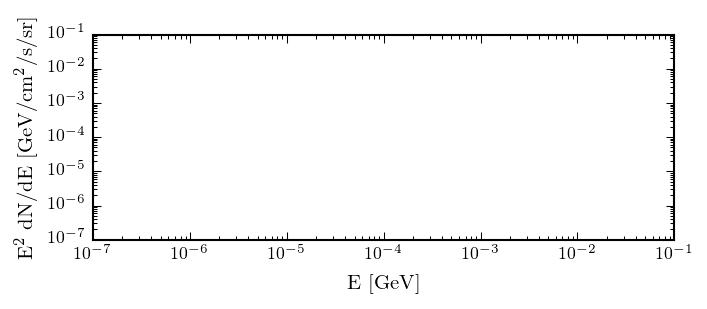

In [12]:
import pickle
plt.figure(figsize=(5,6))
models = ['base_2D', 'base', 'NSPEB_H2_8500', 
          'NSPEB_HI_8500_interp0','NSPEB_HI_8500_interp25','NSPEB_HI_8500_interp50',
          'NSPEB_HI_8500_interp75','NSPEB_HI_8500_interp1.0','Pohl_HI_8500','Pohl_H2_8500']
fits = [pickle.load(open('./results/FitResult_'+ galprop_tag + '.pickle','rb')) for galprop_tag in models]

plt.subplot(311)

for i in range(len(models)):
    fit = fits[i]
    print 'log-like, TS:', models[i], np.sum(fit['loglike']), 2*(np.sum(fits[0]['loglike'])-np.sum(fit['loglike']))
    continue
    E, flux, stat = fit['energies'], fit['DM']['flux'], fit['DM']['fluxunc']
    model = models[i].replace('_no_secondary','').replace('_','-')
    
    if i==0:
        plt.errorbar(E/1e3,E**2*flux/1e3,(E**2*stat[:,0]/1e3,E**2*stat[:,1]/1e3), 
                     label=model,capthick=1, capsize=2, ls=':' )
    else:
        plt.errorbar(E/1e3,E**2*flux/1e3, 
                     label=model,capthick=1, capsize=2, ls='-' )
        
        
plt.legend(frameon=False, fontsize=8)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
plt.xlabel(r'$\rm{E\ [GeV]}$')


E, f0, stat0 = fits[0]['energies'], fits[0]['DM']['flux'], fits[0]['DM']['fluxunc']

for i in range(1,3):
    plt.subplot(312)
    fit = fits[i]
    E, flux, stat = fit['energies'], fit['DM']['flux'], fit['DM']['fluxunc']
    model = models[i].replace('_no_secondary','').replace('_','-')

    plt.errorbar(E/1e3,flux/f0, label=model,capthick=1, capsize=2, ls='-' )
    
    #plt.yscale('log')
    plt.xscale('log')
    plt.ylim(0,2)
    plt.ylabel(r'Ratio')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.legend(frameon=False, fontsize=8)
    
    plt.subplot(313)
    

    TS = -2*(np.array(fit['loglike'])-np.array(fits[0]['loglike']))
    plt.plot(E/1e3, TS)
    print "TS:", TS
    plt.xscale('log')
    
    

plt.errorbar(E/1e3,np.ones(len(E)),yerr=(np.abs(stat0[:,0])/f0,stat0[:,1]/f0), linestyle='')

# plt.xscale('log')
# plt.ylabel(r'$\rm{Ratio\ of\ GCE\ 3FGL/2FGL}$')
# plt.xlabel(r'$\rm{E\ [GeV]}$')

# plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/GCE_3fgl_vs_2fgl.pdf')

    

In [9]:


plt.figure(figsize=(5,6))

# 2FGL 
plt.subplot(211)

flux, stat = fgl2Fit['DM']['flux'], fgl2Fit['DM']['fluxunc']

E = fgl2Fit['energies']

plt.errorbar(E/1e3,E**2*flux/1e3,(E**2*stat[:,0]/1e3,E**2*stat[:,1]/1e3), 
             label='GCE-2FGL',capthick=1, capsize=2, ls=':' )

# 3FGL 
flux3, stat3 = fgl3Fit['DM']['flux'], fgl3Fit['DM']['fluxunc']
E = fgl3Fit['energies']
plt.errorbar(E/1e3,E**2*flux3/1e3,(E**2*stat3[:,0]/1e3,E**2*stat3[:,1]/1e3), 
             label='GCE-3FGL',capthick=1, capsize=2, ls=':' )


plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
plt.xlabel(r'$\rm{E\ [GeV]}$')

plt.subplot(212)


plt.errorbar(E/1e3,flux3/flux, 
             label='ratio',capthick=1, capsize=2, ls=':' )


plt.xscale('log')
plt.ylabel(r'$\rm{Ratio\ of\ GCE\ 3FGL/2FGL}$')
plt.xlabel(r'$\rm{E\ [GeV]}$')

plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/GCE_3fgl_vs_2fgl.pdf')
